<p><img alt="Colaboratory logo" height="45px" src="/img/colab_favicon.ico" align="left" hspace="10px" vspace="0px"></p>



# **Homework 1 (Zixuan Li):**


---


- Please complete each of the problems below
- Show all your code to complete each question
- Provide sentence(s) explaining your solution
- For your decision tree, please be sure to output the actual image directly in python as opposed to a .dot file


It is recommended that you read chapters 3, 4, and 6 to prepare for this module!

**Please use the following dataset for problems 1 - 6**





In [1]:
import pandas as pd

URL_adult='https://raw.githubusercontent.com/kamranbakhtiari/DESC624/main/Adult'
adult = pd.read_csv(URL_adult)

adult


,age,workclass,demogweight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K.
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K.
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K.
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K.
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,41,Private,112507,10th,6,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,60,United-States,<=50K.
24996,19,Private,236940,HS-grad,9,Never-married,Farming-fishing,Own-child,White,Male,0,0,40,United-States,<=50K.
24997,33,Private,278514,HS-grad,9,Divorced,Craft-repair,Own-child,White,Female,0,0,42,United-States,<=50K.
24998,21,?,433330,Some-college,10,Never-married,?,Unmarried,White,Male,0,0,40,United-States,<=50K.


**1. Partition the data set, so that 50% of the records are included in the training data set and 50% are included in the test data set.  Use a bar graph to conifrm your proportions**





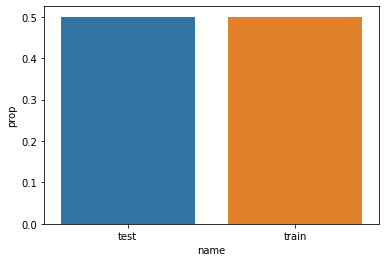

In [2]:
# Test Train Split
from sklearn.model_selection import train_test_split
train, test = train_test_split(adult, test_size=0.5, random_state=42)

# Bar graph
import seaborn as sns
size = pd.DataFrame({"name":['test', 'train'], 
                     "prop":[len(test)/len(adult), len(train)/len(adult)]})
sns.barplot(x='name', y='prop', data=size)

* **Test Train Split**

Use train_test_split function in sklearn package to split the dataset into 50% traning and 50% test. Setting randome_state number to make sure that every time the code is run, identical result can be generated. 

* **Bar Graph**

Before plotting the proportion, use the length (number of records) of training/test dataset to form a size dataframe. Then use the size dataframe to generate a bar plot, and the bar plot shows that each dataset has 50% of the total records.


**2. Identify te total number of records in the training data set, and how many records in the training data set have an income value of < 50k**

In [3]:
# Number of Records in Traning set
print(f'''The number of records in the training dataset is {len(train)}''')

# Number of Records in Traning set with income <50k
print(f'''There are {len(train.loc[train["income"]=='<=50K.'])} records in the training data set have an income value of <50k.''')

The number of records in the training dataset is 12500
There are 9543 records in the training data set have an income value of <50k.


To show the number of records in a dataframe, I use the .len() method. To show the number of records that satisfy certain criteria, i use the .loc() method and conditional operator == to select those records before using .len() method.

**3. Use your answers from the previous excercise to calculate how many records with income >50k you need to resmaple in order to have 35% of the rebalanced data set have incomes of >50k**

In [4]:
print(f'''There are {len(train.loc[train["income"]=='>50K.'])} records in the training set with income of >50K, which is {(len(train.loc[train["income"]=='>50K.'])/len(train))*100}% of the total number of records.
In order to have 35% ({int(.35*len(train))}) of >50K records in the training set, {((.35*len(train)-len(train.loc[train["income"]=='>50K.']))/(1-.35))} records need to be resampled to the training set.''')

There are 2957 records in the training set with income of >50K, which is 23.656% of the total number of records.
In order to have 35% (4375) of >50K records in the training set, 2181.5384615384614 records need to be resampled to the training set.


To calculate the number of records that need to be resampled, I use the equation number = (target proportion * total number of records - existing number of records that fulfill) / (1 - target proportion). In this case, the number need to be resampled = ((0.35*12500)-2957)/(1-0.35) = 2182

**4. Perform the rebalancing described in the previous exercise and confirm that 35% of the records in the rebalanced data set have incomes >50k**

In [5]:
to_resample = train.loc[train['income'] == ">50K."]
our_resample = to_resample.sample(n=2182, replace=True)
train_rebal = pd.concat([train, our_resample])
train_rebal.income.value_counts(normalize=True)

<=50K.    0.64998
>50K.     0.35002
Name: income, dtype: float64

First subset the records that fulfill the requirement, and use .sample() method to replace 2182 (calculated in the previous step) records. Finally, combine the replaced records with the original training dataframe. The result from .value_counts() method shows that there're 35% records in the >50K. income category. 

**5. Validate your partition by performing a two-sample Z-test for the difference in means for the mean age in the training set versus the mean age in the test set?**

In [6]:
import statsmodels.stats.weightstats as ws
cm_obj = ws.CompareMeans(ws.DescrStatsW(train_rebal['age']), ws.DescrStatsW(test['age']))
stat1, pval1 = cm_obj.ztest_ind()
print(f'''The z-value is: {stat1}''')
print(f'''The p-value is: {pval1}''')

The z-value is: 4.833007809531671
The p-value is: 1.3448550937633549e-06


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


To compare mean of 2 sets of numerical sample data, I use CompareMeans in statsmodels package. The p-value of the test is far less than 0.05, so the test result is significant. Also, the Z value is greater than 1.96 (95%CI), so we are able to reject the null hypothesis that the mean age of the two dataset are the same.

**6. Validate your partition by performing a two-sample Z-test for the difference in proportion of >50k records in the training set versus the proportion of >50k records in the test set?**

In [7]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest
counts = np.array([len(train_rebal.loc[train_rebal["income"]=='>50K.']), 
                   len(test.loc[test["income"]=='>50K.'])])
nobs = np.array([len(train_rebal), len(test)])
stat2, pval2 = proportions_ztest(counts, nobs)
print(f'''The z-value is: {stat2}''')
print(f'''The p-value is: {pval2}''')

The z-value is: 19.332419409947466
The p-value is: 2.866551737802054e-83


To compare proportion of 2 sets of numerical sample data, I use proportions_ztest in statsmodels package. Number of observation is the total number of records, and counts is the number of records with income value of >50K. The p-value of the test is far less than 0.05, so the test result is significant. Also, the Z value is greater than 1.96 (95%CI), so we are able to reject the null hypothesis that the proportion of income >50K in the two dataset are the same.

**Please use the following dataset for problems 7 - 8**

In [8]:
import pandas as pd

URL_loan_training='https://raw.githubusercontent.com/kamranbakhtiari/DESC624/main/Loans_Training'
URL_loan_test='https://raw.githubusercontent.com/kamranbakhtiari/DESC624/main/Loans_Test'

loan_test = pd.read_csv(URL_loan_test)
loan_training = pd.read_csv(URL_loan_training)

loan_test
loan_training

,Approval,Debt-to-Income Ratio,FICO Score,Request Amount,Interest
0,F,0.00,397,1000,450.0
1,F,0.00,403,500,225.0
2,F,0.00,408,1000,450.0
3,F,0.00,408,2000,900.0
4,F,0.00,411,5000,2250.0
...,...,...,...,...,...
150297,T,0.38,709,19000,8550.0
150298,T,0.38,722,17000,7650.0
150299,T,0.38,747,11000,4950.0
150300,T,0.39,679,10000,4500.0


**7. Create a CART model using the training data set that predicts Approval using Debt to Income Ratio, FICO score, and Request Amount. Visualize the decision Tree (make sure the decision tree appears directly in this workbook, not a seperate .dot file).  Describe the first few splits in the decision tree.  What do the values in the brackets represent?  The sample size for each node?  the Root?**

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


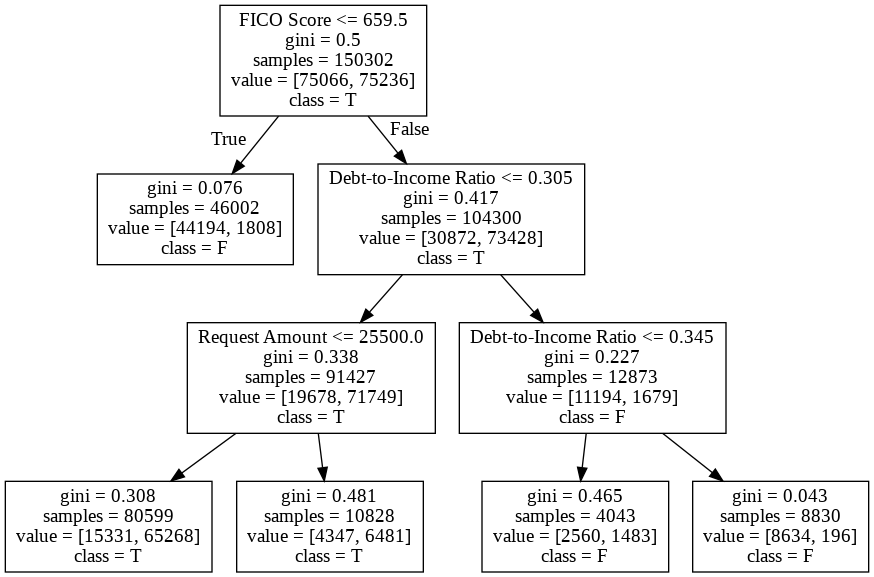

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO 
from IPython.display import Image 
from pydot import graph_from_dot_data
import matplotlib as mpl

mpl.rcParams["figure.dpi"] = 150

y = loan_training[['Approval']]
X_names=["Debt-to-Income Ratio", "FICO Score", "Request Amount"]
clf1=DecisionTreeClassifier(criterion="gini", max_leaf_nodes=5).fit(loan_training[X_names], y)
export_graphviz(clf1, out_file = "clf1.dot", feature_names=X_names, class_names=['F', 'T'])
decisiontree01= StringIO()
export_graphviz(clf1, out_file = decisiontree01, feature_names=X_names, class_names=['F', 'T'])
(graph, ) = graph_from_dot_data(decisiontree01.getvalue())
Image(graph.create_png())

The CART model first decide whether approve or not based on the independent variables. First, it separates by FICO socre. If the FICO Score is less than or equal to 659.5, it's not approved. Then it separates by Debt-to-Income Ratio. For those with a FICO score higher than 659.5, if its Debt-to-Income Ratio is larger than 0.305, it's not approved, otherwize it's approved. The values in the brackets represent number of approved and not approved in each Root, tree or node. For example, in the node where FICO score lower than 659.5, there're 44,194 not approved, and 1,808 approved records.

**8. Create a CART model using the test data set that uses the same target and predictor variables.  Visualize the decision Tree (make sure the decision tree appears directly in this workbook, not a seperate .dot file).  Describe the first few splits in the decision tree.  What do the values in the brackets represent?  The sample size for each node?  the Root?  Does the tree built using the test data match the tree built using the training data?**

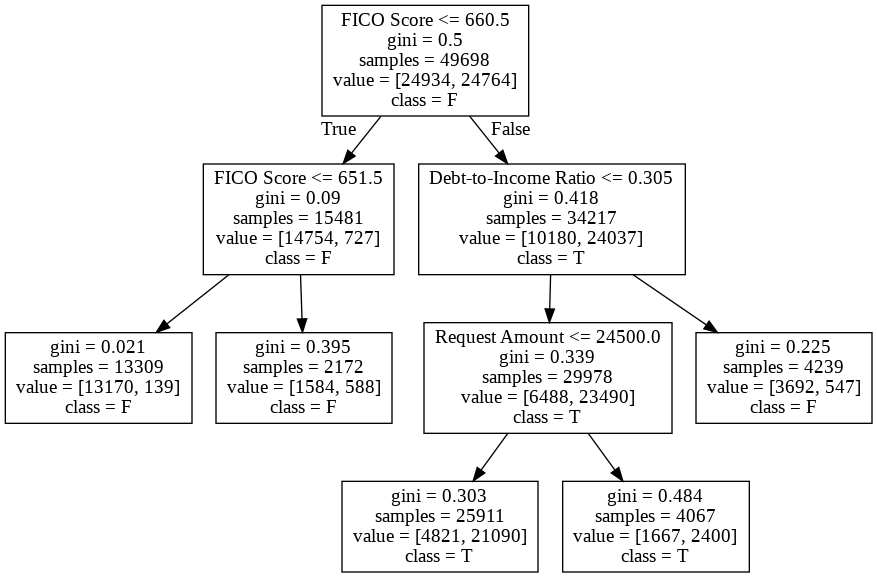

In [10]:
y = loan_test[['Approval']]
X_names=["Debt-to-Income Ratio", "FICO Score", "Request Amount"]
clf2=DecisionTreeClassifier(criterion="gini", max_leaf_nodes=5).fit(loan_test[X_names], y)
export_graphviz(clf2, out_file = "clf2.dot", feature_names=X_names, class_names=['F', 'T'])
decisiontree02= StringIO()
export_graphviz(clf2, out_file = decisiontree02, feature_names=X_names, class_names=['F', 'T'])
(graph, ) = graph_from_dot_data(decisiontree02.getvalue())
Image(graph.create_png())

The CART model first decide whether approve or not based on the independent variables. First, it separates by FICO socre. If the FICO Score is less than or equal to 660.5, it's not approved. Then it separates by Debt-to-Income Ratio. For those with a FICO score higher than 659.5, if its Debt-to-Income Ratio is larger than 0.305, it's not approved, otherwize it's approved. The values in the brackets represent number of approved and not approved in each Root, tree or node. For example, in the node where FICO score lower than 660.5, there're 14,754 not approved, and 727 approved records.

The tree built based on test dataset is very similar to that built based on training dataset, except that the threashold of FICO Score is slightly different.
